<hr>
<h1> Ejercicio de Graficación</h1>
<hr>

In [1]:
# Cargando librería Pandas
import pandas as pd
# Cargando librería Matplotlib
import matplotlib.pyplot as plt
# Cargando complemento de Matplotlib
import seaborn as sns

# Permite generar la gráfica en una celda
sns.set(style="darkgrid")

df = pd.read_csv('datos.csv')
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [2]:
len(df)

25500

In [3]:
df.dtypes

Year                       int64
Rank                       int64
Company                   object
Revenue (in millions)    float64
Profit (in millions)      object
dtype: object

In [4]:
# Nombrando las columnas
df.columns=['Año','Posicion','Compañia','Ingresos','Capital']

In [5]:
df.tail()

,Año,Posicion,Compañia,Ingresos,Capital
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


In [6]:
# Buscar las filas donde Capital es un valor no numérico
no_capital = df.Capital.str.contains('[^0-9.-]')

In [7]:
df.loc[no_capital].head()

,Año,Posicion,Compañia,Ingresos,Capital
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


In [8]:
# Determinando que porcentaje d elas filas tienen un valor no numérico en la columna capital
(len(df.Capital[no_capital])/len(df))*100

1.4470588235294117

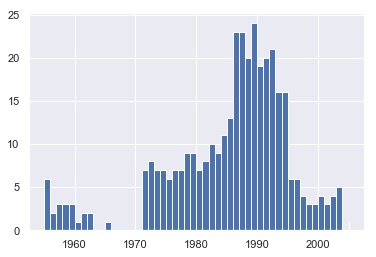

In [9]:
set(df.Capital[no_capital])
valores,anios, barras = plt.hist(df.Año[no_capital], df.Año)
# Valores -> valores graficados (de 0 minimo a 24 máximo) valores de Capital faltantes por año en el archivo csv
# máximo 25 valores faltantes por año (5%) no es significativo

In [10]:
df = df.loc[~no_capital]
df.Capital
len(df)
# Se cambió a númerico el tipo de datos de la comlumna Capital
df.dtypes

Año           int64
Posicion      int64
Compañia     object
Ingresos    float64
Capital      object
dtype: object

In [11]:
# ---------------------------------------
# Graficar las  ganancias de las compañías
#---------------------------------------
agrupar_año = df.loc[:,
                    ['Año','Ingresos','Capital']].groupby('Año')
promedio = agrupar_año.mean()
x = promedio.index
y = promedio.Capital
#print(y) para comprobar los datos agrupados

def graficar(x, y, ax, titulo, y_label):
    #Asignar un título a la gráfica
    ax.set_title(titulo)
    #Asignar el título a los ejes y, x
    ax.set_ylabel(y_label)
    ax.set_xlabel("Años")
    #Desplegar la gráfica considerando los valores de x e y
    ax.plot(x,y)
    #Fijar el "padding" a cada uno de los límites de los ejes
    ax.margins(x=0,y=0)
    
fig, ax = plt.subplots()
graficar(x,y,ax,"Ganancias entre 1955 al 2005 de las Compañías","Ganancias")
#Graficar las  ganancias de las compañías
#---------------------------------------
agrupar_año = df.loc[:,
                    ['Año','Ingresos','Capital']].groupby('Año')
promedio = agrupar_año.mean()
x = promedio.index
y = promedio.Capital
#print(y) para comprobar los datos agrupados

def graficar(x, y, ax, titulo, y_label):
    #Asignar un título a la gráfica
    ax.set_title(titulo)
    #Asignar el título a los ejes y, x
    ax.set_ylabel(y_label)
    ax.set_xlabel("Años")
    #Desplegar la gráfica considerando los valores de x e y
    ax.plot(x,y)
    #Fijar el "padding" a cada uno de los límites de los ejes
    ax.margins(x=0,y=0)
    
fig, ax = plt.subplots()
graficar(x,y,ax,"Ganancias entre 1955 al 2005 de las Compañías","Ganancias")

AttributeError: 'DataFrame' object has no attribute 'Capital'

In [ ]:
# Graficar el incremento promedio de los ingresos
y = promedio.Ingresos
fig, ax = plt.subplots()
graficar(x, y2, ax, "Incremento promedio de ingresos entre 1",
                     "Ingreso (Millones)")

In [ ]:
# Graficar la media y la desviación estándar
def graficar_dev_estandar(x,y,est,ax,titulo,y_label):
    ax.fill_between(x,y-est,y+est,alpha=0.2)
    graficar(x,y,ax,titulo,y_label)
    
fig, (ax1, ax2) = plt.subplots(ncols=2)
titulo = " %s: Incremento en media y estándar para"\
         "las compañías desde 1955 a 2005"
est1 = agrupar_año.std().Capital.values
est2 = agrupar_año.std().Ingresos.values
graficar_dev_estandar(x,y,est1,ax1,titulo % 'Ganancias', 'Ganancias (Millones)')
graficar_dev_estandar(x, y, est2, ax2, titulo % 'Ganancias','Ganancia (Millones)')
